## Mental Physics Simulation

In [1]:

# Template code for Assignment 7


import random
import time
import pygame
import numpy
from pygame.locals import *
from pygame.color import *
import pymunk
from pymunk import Vec2d
import pymunk.pygame_util

# Some general variables -- you don't need to change any of these
N_BLOCKS = 6 # How many blocks will fall?
BLOCK_SIZE = 20 # How big are the blocks?
deltaY     = 35 # How far spaced out vertically are they?
xSD        = 30.0 # What is the SD for their x-locations?
FPS = 7. # how many frames per second do we run?
BLOCK_MASS = 1.0
BLOCK_FRICTION = 1.0
FLOOR = 100
RUN_TIME = 10.0 # Time in seconds that we will run a simulation for
STEPS_PER_FRAME = 5.0 # Do not change this
WIDTH = 600 # Screen dimensions -- don't change
HEIGHT = 600

class BlockTower:
    # Implement a class to show/simulate blocks falling via pymunk
    # Note: this code has been modified from the pymunk pyramid demo

    def __init__(self, positions):
        # The intializer takes a list of x-positions for blocks; their height is set
        # by the code here.
        assert(len(positions)==N_BLOCKS) # can't give more than N_BLOCKS since we need to draw them

        self.positions = positions # store the positions of our blocks

        # Set up some pygame stuff
        self.running = True
        self.physics_running = False
        self.start_time = 0
        self.drawing = True
        self.w, self.h = WIDTH,HEIGHT
        self.screen = pygame.display.set_mode((self.w, self.h))
        self.clock = pygame.time.Clock()

        ### Init pymunk and create space
        self.space = pymunk.Space()
        self.space.gravity = (0.0, -900.0)
        self.space.sleep_time_threshold = 0.3

        self.floor = pymunk.Segment(self.space.static_body, (0, FLOOR), (self.w,FLOOR), 1.0)
        self.floor.friction = 1.0
        self.space.add(self.floor)

        # Draw each block and add it to the physics
        for i in range(N_BLOCKS):
            points = [(-BLOCK_SIZE, -BLOCK_SIZE), (-BLOCK_SIZE, BLOCK_SIZE), (BLOCK_SIZE,BLOCK_SIZE), (BLOCK_SIZE, -BLOCK_SIZE)]
            moment = pymunk.moment_for_poly(BLOCK_MASS, points, (0,0))
            body = pymunk.Body(BLOCK_MASS, moment)
            xpos = self.positions[i]
            ypos = FLOOR + (2*i+1) * deltaY
            body.position = Vec2d(xpos,ypos)
            shape = pymunk.Poly(body, points)
            if(i == N_BLOCKS-1):     # color the top
                shape.color = (1,0,0,1)
                self.target_block = shape # store the top one we are tracking
            shape.friction = 1
            self.space.add(body,shape)

        ### draw options for drawing
        self.draw_options = pymunk.pygame_util.DrawOptions(self.screen)

    def is_black_block_on_floor(self):
        # Returns true or false depending on whether the black block is on the bottom
        col = self.target_block.shapes_collide(self.floor) # this resturns a ContactPointSet
        return len(col.points) > 0

    def run_person(self):
        # Show a window where people can predict yes/no (y/n) for whether the black block hits the bottom.
        # After they respond, they can observe the physics.
        # Rteturns their prediction and whether the black block actually hit the floor

        prediction = None # what people predicted?

        # Call this to run a single simulation with the given positions
        while self.running and (time.time() - self.start_time) < RUN_TIME or self.start_time==0:
            for event in pygame.event.get():
                if event.type == QUIT:
                    self.running = False
                elif event.type == KEYDOWN and event.key == K_ESCAPE:
                    self.running = False
                elif event.type == KEYDOWN and (event.key == K_y or event.key==K_n):  ## This detects a space press and starts simulating
                    prediction = (event.key == K_y)
                    self.physics_running = True
                    self.start_time = time.time()  # remember the time that physics started running

            if self.physics_running:
                self.space.step(1.0 / FPS / STEPS_PER_FRAME)  ## conveera frames per second to internal clock tics -- don't change!

            if self.drawing:
                self.draw()

            self.clock.tick(FPS) # don't let this loop run faster than FPS
        return (prediction, self.is_black_block_on_floor())

    def simulate(self):
        # Just run a simulation, returning whether after 10s the black block hits the floor
        for s in range(int(FPS*5*RUN_TIME)): # run for 10s
            self.space.step(1.0 / FPS / STEPS_PER_FRAME) # run this many steps
        return self.is_black_block_on_floor()

    def draw(self):
        ### This gets called to draw the scene

        ### Clear the screen
        self.screen.fill(THECOLORS["white"])

        ### Draw space  with our given options
        self.space.debug_draw(self.draw_options)

        ### All done, lets flip the display, which will cause it to be displayed
        pygame.display.flip()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Darwin (64bit) [/Users/catherinewang/anaconda3/lib/python3.6/site-packages/pymunk/libchipmunk.dylib]


In [ ]:
#######################
### Main code below ###
#######################

if __name__ == '__main__':

    # make some blocks at WIDTH/2 with a given SD
    positions = [numpy.random.normal(WIDTH/2, xSD) for _ in range(N_BLOCKS)]

    demo = BlockTower(positions)
    print(demo.simulate())

    # Create a second one to show the blocks falling and get responses
    # (note: we CAN'T run demo.run_person because that one has alread run -- we have to make a new BlockTower object)
    demo2 = BlockTower(positions)
    print(demo2.run_person())

    # This closes the window
    pygame.quit()


In [2]:
import dill
# dill.dump_session('notebook_env.db')
# dill.load_session('notebook_env.db')

## 1

**See code below. 'store' stores the three variables. For brevity, only code is shown - the actual store variable is a 200 length list of lists with the 3 variables.**

In [64]:
import pickle

In [65]:
store = []

for i in range(200):
    
    if __name__ == '__main__':

        # make some blocks at WIDTH/2 with a given SD
        positions = [numpy.random.normal(WIDTH/2, xSD) for _ in range(N_BLOCKS)]

        demo = BlockTower(positions)
        store += [[positions, demo.run_person()]]

        # This closes the window
        pygame.quit()

   

KeyboardInterrupt: 

In [68]:
len(store)

200

## 2

**A good model of me would look like a perfectly straight linear trend upwards because as the model prediction converges towards a near 100% true rate, my predictions should also follow suit. Mine approximates this graph, though the line is not perfectly linear (there are unexpected ups and downs).**

**See graph and code below**

In [5]:
to_table = []

In [6]:
for sim in store:
    av = 0
    for i in range(100):
        new_pos = [numpy.random.normal(pos, 10) for pos in sim[0]]
        demo = BlockTower(new_pos)
        if demo.simulate() == True:
            av += 1
    if sim[1][0] == True:
        to_table += [[1, av/100]]
    else:
        to_table += [[0, av/100]]

In [8]:
len(to_table)

200

In [15]:
response = np.zeros(10)
count = np.zeros(10)
for i in to_table:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[5] += 1
        response[5] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[7] += 1
        response[7] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[9] += 1
        response[9] += i[0]

In [18]:
import matplotlib.pyplot as plt

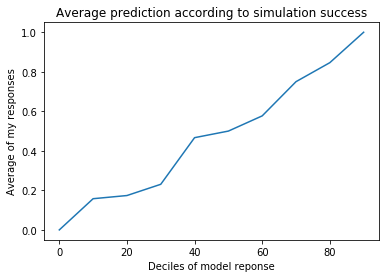

In [28]:
plt.plot(np.arange(0,100,10), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

# 3

** To determine the best S value, we can examine the plot to see how linear it is. If it is nearly a straight line, or is straighter relative to other S values, then it is a better match to my responses. Based on this calculation/observation, I conclude that my S value is the best at 100. Given this result, I conclude that my guesses match best with the simulator when there is a lot of noise - an indication that my intuition is not very accurate. **

**Plots and code are below**

In [53]:
sd = list([1, 5, 10, 15, 20, 50, 100])
results = []
for i in sd:
    to_table = []
    for sim in store:
        av = 0
        for i in range(50):
            new_pos = [numpy.random.normal(pos, i) for pos in sim[0]]
            demo = BlockTower(new_pos)
            if demo.simulate() == True:
                av += 1
        if sim[1][0] == True:
            to_table += [[1, av/50]]
        else:
            to_table += [[0, av/50]]
    results += [[to_table]]

In [7]:
import numpy as np

In [54]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[0][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]

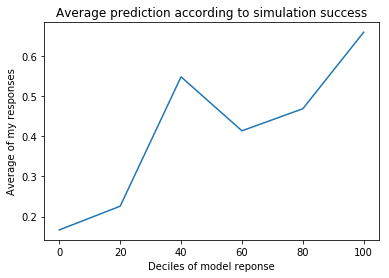

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

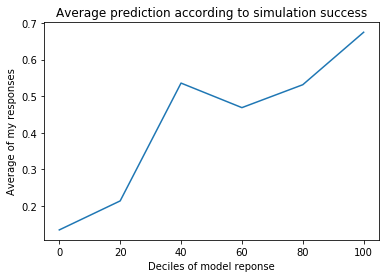

In [57]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[1][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
        
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

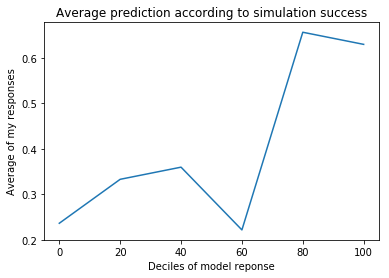

In [58]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[2][0]:
       if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
        
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

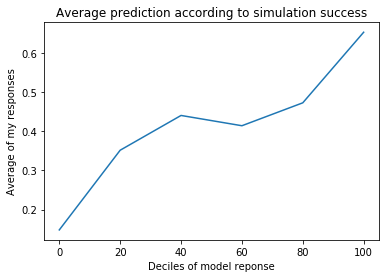

In [59]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[3][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
        
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

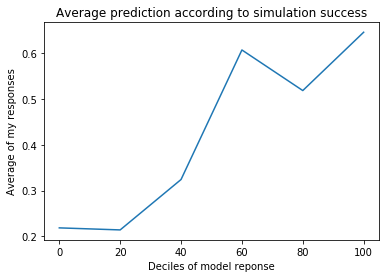

In [60]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[4][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
        
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

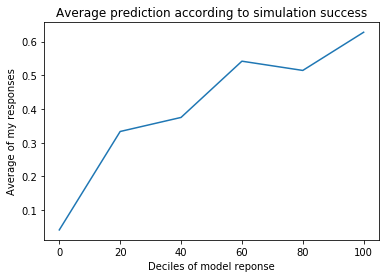

In [61]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[5][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

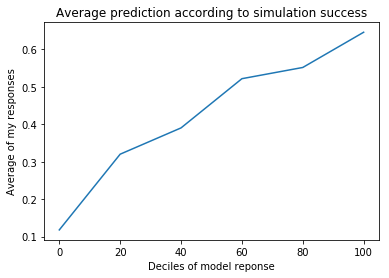

In [62]:
response = np.zeros(6)
count = np.zeros(6)
for i in results[6][0]:
    if i[1] <= .10:
        count[0] += 1
        response[0] += i[0]
    if i[1] > .10 and i[1] <= .20:
        count[1] += 1
        response[1] += i[0]
    if i[1] > .20 and i[1] <= .30:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .30 and i[1] <= .40:
        count[2] += 1
        response[2] += i[0]
    if i[1] > .40 and i[1] <= .50:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .50 and i[1] <= .60:
        count[3] += 1
        response[3] += i[0]
    if i[1] > .60 and i[1] <= .70:
        count[6] += 1
        response[6] += i[0]
    if i[1] > .70 and i[1] <= .80:
        count[4] += 1
        response[4] += i[0]
    if i[1] > .80 and i[1] <= .90:
        count[8] += 1
        response[8] += i[0]
    if i[1] > 0.9 and i[1] <= 1:
        count[5] += 1
        response[5] += i[0]
        
plt.plot(np.arange(0,101,20), response/count)

plt.title("Average prediction according to simulation success")
plt.xlabel("Deciles of model reponse")
plt.ylabel("Average of my responses")
plt.show()

# 3. Extra Credit

On average, the five friends that I tested had mean responses which were lower than 50%. This means that on average, each friend predicted more often that the box would not fall on the table than that it would. The exact breakdown was: 8, 7, 10, 6, 7. These numbers correspond to the amount of times that 'y' was pressed over 'n'. Their average prediction thus does not completely agree with the model. This may be because they are unfamiliar with the simulation, and exactly how it functions, and in 20 tries, erred on the side of caution when making this judgement call.

Note: code for this portion not shown because my kernel crashed a few times, so I created a new file and restarted the kernel (did not want to risk crashing it again)